<a href="https://colab.research.google.com/github/AndreMouraL/Desafio-4-limpeza-de-dados/blob/main/Desafio_4_limpeza_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

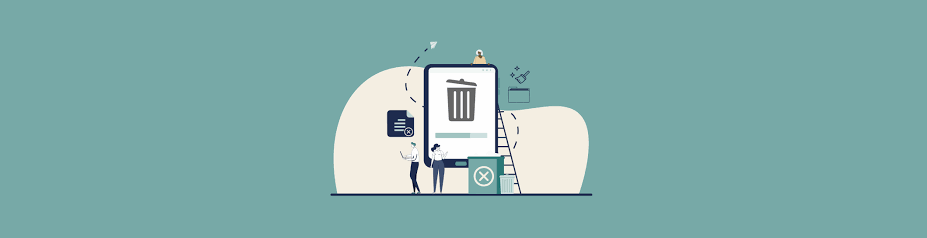

**PARTE 1 - LIMPEZA E TRATAMENTO DE DADOS**

SEMANAS DO DESAFIO 11, 12 E 13  e outras referências.

ANDRE MOURA LIMA

Utilizando suas habilidades ninja em Python e
bibliotecas como Pandas, Numpy, Seaborn e outras, você deve:


- Altere os nomes das colunas para letras minúsculas, utilizando a biblioteca pandas;
- Explore colunas categóricas, utilizando função ***groupby()*** e outras, visando aplicar os gráficos para visualizações e a compreensão desses dados.
- Explore colunas numéricas, utilizando a função ***describe**()*, faça um *boxplot* ou outro gráfico que achar necessário, utilizando as bibliotecas pandas e  **seaborn;**
- **Corrigir os dados faltantes  (*NANs)*** e preencher as lacunas com valores adequados.
- **Tratar os outliers, substituindo-os pelos valores adequados**.
- **Eliminar os duplicados, para** garantir a unicidade.
- **corrigir os dados categóricos, por exemplo,** "Mas" para "Masculino", "Fem" para "Feminino" e outras inconsistências se houver, para adequá-los ao padrão.
- Mostre o tamanho dos dados importados, utilizando o *shape*.

**PARTE 2 - ESTATISTICA:**

- Apresente a média e a mediana do **saldo na conta** dos clientes abaixo de 40 anos;
- Apresente a média e a mediana do **saldo na conta** dos clientes acima de 40 anos;
- Apresente a média e a mediana do **saldo na conta** dos clientes que saíram e dos que permaneceram;
- Dos que saíram, mostre qual é o público predominante (Masculino ou Feminino), a idade, o saldo na conta, patrimônio e os seus respectivos estados;

**DESAFIO: ANÁLISE DE CLIENTES BANCÁRIOS – RELATÓRIO PARA O GERENTE**

**FLUXO DE TRABALHO** - DIAGRAMA DE ATIVIDADES

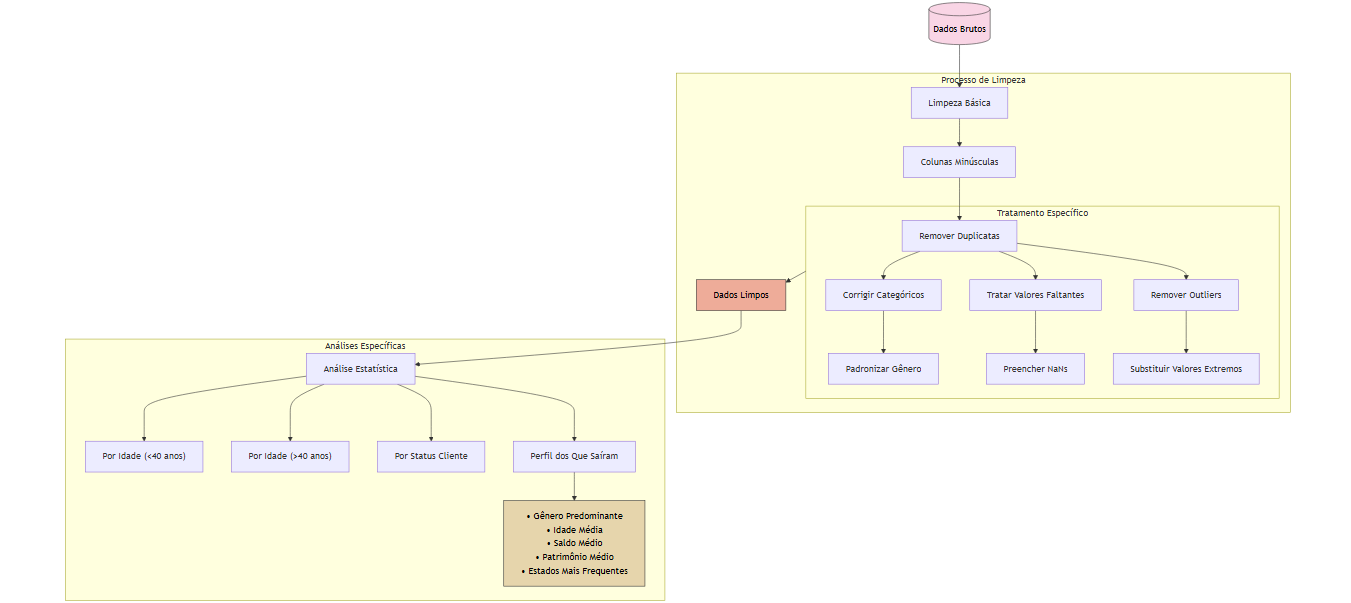

**IMPORTANDO PLANILHA** - DADOS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Essas são as principais bibliotecas
!pip install pandas numpy seaborn openpyxl


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Bibliotecas

In [152]:
import pandas as pd

# ID da sua planilha...
sheet_id = "1TUCtbo_xxkFqXoX93FT0JN5e1seirwYHOOq9t8ElfI0"

# Nome da aba que você quer ler (ex: 'Planilha1')...
sheet_name = "Planilha1"

# Montar a URL para ler como xlsx...
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

# Ler o arquivo
dados = pd.read_csv(url)

# Mostrar o shape (linhas, colunas)...
print(f"Formato do DataFrame: {dados.shape}")

# Visualizar as primeiras linhas...
#dados.head()

# Definição importando aquivo local. Esse módulo pegar direto no driver montado.

Formato do DataFrame: (999, 12)


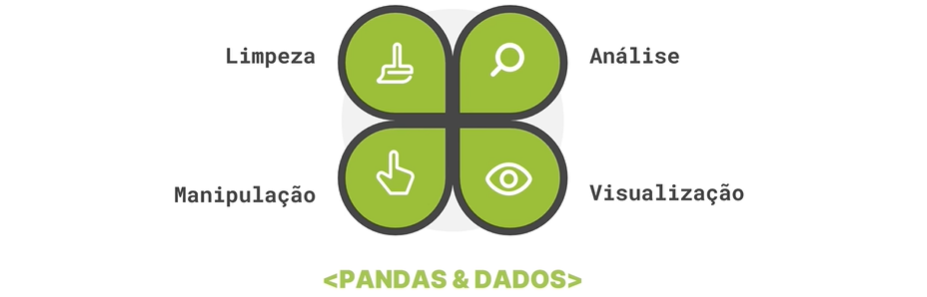

In [153]:
dados.head(10)

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTOS,POSSUI CARTAO,ATIVO,SALARIO ANUAL,SAIU
0,1,619,PI,Feminino,42,2,0,1,1,1,1.013489e+07,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,1.125426e+07,0
2,3,502,PI,Feminino,42,8,1596608,3,1,0,1.139316e+07,1
3,4,699,PI,Feminino,39,1,0,2,0,0,9.382663e+06,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,7.908410e+05,0
5,6,645,CE,Masculino,44,8,11375578,2,1,0,1.497567e+07,1
6,7,822,PI,Mas,50,7,0,2,1,1,1.006280e+05,0
7,8,376,MA,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
8,9,501,PI,Masculino,44,4,14205107,2,0,1,7.494050e+05,0
9,10,684,PI,Masculino,27,2,13460388,1,1,1,7.172573e+06,0


**read_excel()**: Essa função é usada para ler arquivos do Excel (.xls ou .xlsx) e criar um DataFrame a partir dos dados.

read - Visualizar apenas algumas linhas iniciais da nossa base de dados.

**Para peguar as 5 últimas linhas.**

In [154]:
dados.tail()

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTOS,POSSUI CARTAO,ATIVO,SALARIO ANUAL,SAIU
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0
998,1000,811,MA,Feminino,28,4,16773882,2,1,1,990342.0,0


**TIPO DE DADOS**

In [155]:
type(dados)

pandas.core.frame.DataFrame

1 - Altere os nomes das colunas para letras minúsculas, utilizando a biblioteca **pandas**;

In [156]:
dados.columns

Index(['ID', 'PONTOS', 'ESTADO', 'GENERO', 'IDADE', 'BENS', 'SALDO NA CONTA',
       'PRODUTOS', 'POSSUI CARTAO', 'ATIVO', 'SALARIO ANUAL', 'SAIU'],
      dtype='object')

In [157]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              999 non-null    int64  
 1   PONTOS          999 non-null    int64  
 2   ESTADO          999 non-null    object 
 3   GENERO          991 non-null    object 
 4   IDADE           999 non-null    int64  
 5   BENS            999 non-null    int64  
 6   SALDO NA CONTA  999 non-null    int64  
 7   PRODUTOS        999 non-null    int64  
 8   POSSUI CARTAO   999 non-null    int64  
 9   ATIVO           999 non-null    int64  
 10  SALARIO ANUAL   992 non-null    float64
 11  SAIU            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [158]:
dados['PONTOS']

,PONTOS
0,619
1,608
2,502
3,699
4,850
...,...
994,838
995,610
996,811
997,587


In [159]:
dados[['PONTOS', 'ESTADO']]

,PONTOS,ESTADO
0,619,PI
1,608,CE
2,502,PI
3,699,PI
4,850,CE
...,...,...
994,838,CE
995,610,CE
996,811,CE
997,587,CE


Alteração de Maiúscula para menúscula


In [160]:
# Deixar todas as colunas em minúsculo
dados.columns = dados.columns.str.lower()

# Conferir
dados.head()


,id,pontos,estado,genero,idade,bens,saldo na conta,produtos,possui cartao,ativo,salario anual,saiu
0,1,619,PI,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,PI,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,PI,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


 2 - Corrigir os dados categóricos, por exemplo, "Mas" para "Masculino", "Fem" para "Feminino" e outras inconsistências se houver, para adequá-los ao padrão.

In [161]:
# Padronizar gênero
dados['genero'] = dados['genero'].replace({
    'Mas': 'Masculino',
    'Fem': 'Feminino',
    'M': 'Masculino',
    'F': 'Feminino'
})

# Verificar valores únicos após correção
print("\nValores únicos na coluna 'genero':")
print(dados['genero'].unique())


Valores únicos na coluna 'genero':
['Feminino' 'Masculino' nan]


Visualizar valores alterados

In [ ]:
# Exemplo de DataFrame
dados = pd.DataFrame({'genero': ['Mas', 'Fem', 'MASC', 'FEMIN', 'Masculino', 'Feminino']})

# Substituir valores abreviados por formas completas
dados['genero'] = dados['genero'].replace({
    'Mas': 'Masculino',
    'Fem': 'Feminino',
    'MASC': 'Masculino',
    'FEMIN': 'Feminino'
})

# Visualizar os valores únicos após a substituição
valores_unicos = dados['genero'].unique()
print(valores_unicos)

['Masculino' 'Feminino']


3 - Eliminar os duplicados, para garantir a unicidade.

In [162]:
# Verificar duplicados
print(f"Número de linhas duplicadas: {dados.duplicated().sum()}")

# Remover duplicados
dados.drop_duplicates(inplace=True)
print(f"Formato após remoção: {dados.shape}")


Número de linhas duplicadas: 1
Formato após remoção: (998, 12)


4 - Corrigir os dados faltantes  (**NANs**) e preencher as lacunas com valores adequados.

In [163]:
dados.isnull().sum()

,0
id,0
pontos,0
estado,0
genero,8
idade,0
bens,0
saldo na conta,0
produtos,0
possui cartao,0
ativo,0


In [164]:
dados.fillna(0) #ver onde estao os valores nulos em qual coluna.

,id,pontos,estado,genero,idade,bens,saldo na conta,produtos,possui cartao,ativo,salario anual,saiu
0,1,619,PI,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,PI,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,PI,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0


In [165]:
dados = dados.fillna(0) # colocar zero nas colunas com valores nulos

In [166]:
dados.isnull().sum()

,0
id,0
pontos,0
estado,0
genero,0
idade,0
bens,0
saldo na conta,0
produtos,0
possui cartao,0
ativo,0


In [167]:
# Verificar quantidade de valores nulos
print(dados.isnull().sum())

# Preencher valores nulos
# Estratégia: para numéricos, preencher com a média; para categóricos, preencher com a moda
for col in dados.columns:
    if dados[col].isnull().sum() > 0:
        if dados[col].dtype == 'object':
            dados[col].fillna(dados[col].mode()[0], inplace=True)
        else:
            dados[col].fillna(dados[col].mean(), inplace=True)


id                0
pontos            0
estado            0
genero            0
idade             0
bens              0
saldo na conta    0
produtos          0
possui cartao     0
ativo             0
salario anual     0
saiu              0
dtype: int64


In [ ]:
#dados.query('genero == 0 | ativo == 0') / remover colunas

In [168]:
dados

,id,pontos,estado,genero,idade,bens,saldo na conta,produtos,possui cartao,ativo,salario anual,saiu
0,1,619,PI,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,PI,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,PI,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0


5 - Tratar os outliers, substituindo-os pelos valores adequados.

Metodo 2 outra referência:

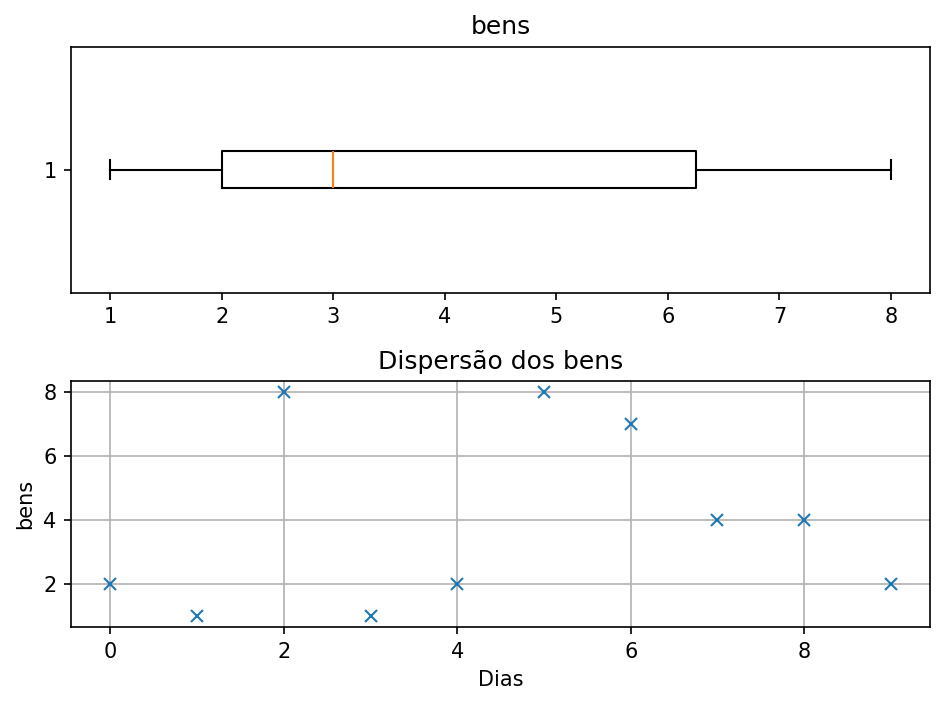

In [26]:


# Dados de temperatura de exemplo (você pode substituir pelos seus)
dados = [2, 1, 8, 1, 2, 8, 7, 4, 4, 2]

# Conversão para array numpy
temp = np.array(dados)

# Plotagem
plt.figure(dpi=150)
plt.subplot(211)
plt.boxplot(temp, vert=False)
plt.title("bens")

plt.subplot(212)
plt.plot(temp, 'x')
plt.grid()
plt.title("Dispersão dos bens")
plt.xlabel("Dias")
plt.ylabel("bens")

plt.tight_layout()
plt.show()


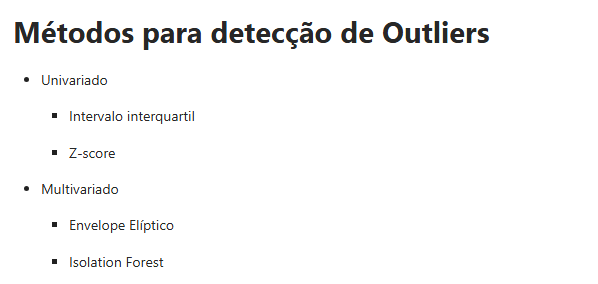

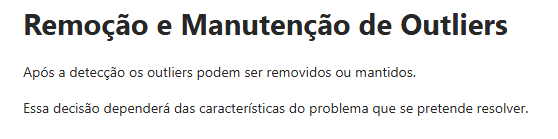

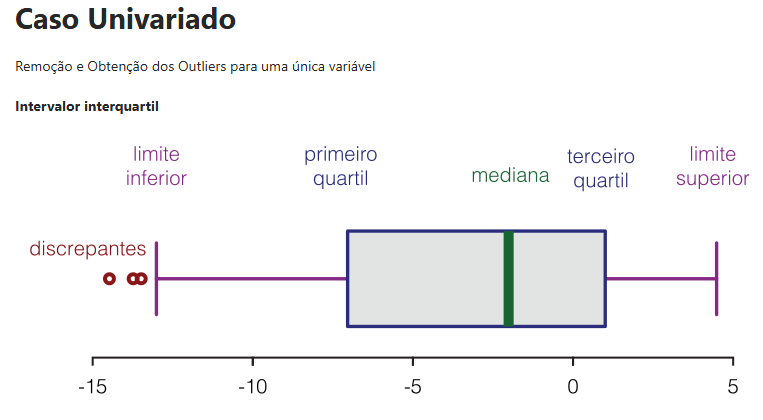



Referêcia: [Aqui](https://pt.wikipedia.org/wiki/Amplitude_interquartil)



**1º Passo:** Calcular os quartis


*   Q1: 25º percentil (quartil inferior)
*   Q3: 75º percentil (quartil superior)

In [169]:
Q1 = np.percentile(temp, 25)
Q3 = np.percentile(temp, 75)

print('Q1: %.2f' %Q1)
print('Q3: %.2f' %Q3)

Q1: 2.00
Q3: 6.25


**2º Passo:** Calcular Intervalor interquartil (IIQ) e os limites inferior e superior, utilizando uma constante
, que geralmente recebe o valor 1,5.

In [170]:
C   = 1.5
IIQ = Q3 - Q1
LI  = Q1 - C*IIQ
LS  = Q3 + C*IIQ

print('IIQ: %.2f' %IIQ)
print('Limites:')
print(' Inferior: %.2f' %LI)
print(' Superior: %.2f' %LS)

IIQ: 4.25
Limites:
 Inferior: -4.38
 Superior: 12.62


**3º Passo:** Obtém e Remove os Outliers, que são os valores abaixo do limite inferior ***LI***
 ou acima do limite superior ***LS***.

In [171]:
#Obtém e Remove os Outliers
temp_sem_outliers_IIQ = []
outliers              = []
for t in temp:
    if t > LS or t < LI:
        outliers.append(t)
    else:
        temp_sem_outliers_IIQ.append(t)

print('Outliers: ')
print(outliers)
print('Sem Outliers: ')
print(temp_sem_outliers_IIQ)

Outliers: 
[]
Sem Outliers: 
[np.int64(2), np.int64(1), np.int64(8), np.int64(1), np.int64(2), np.int64(8), np.int64(7), np.int64(4), np.int64(4), np.int64(2)]


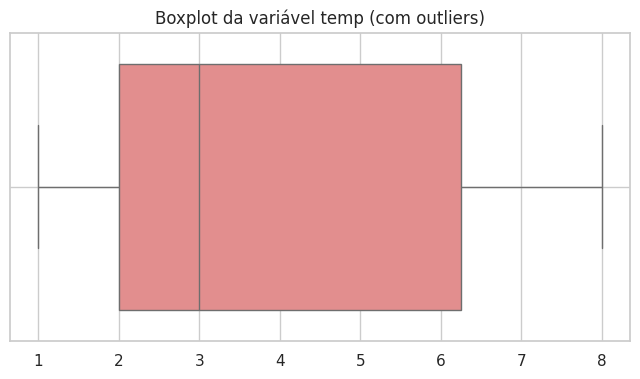

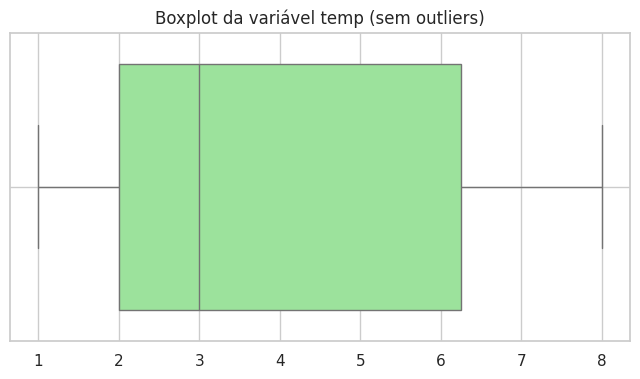

In [173]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Boxplot com outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=temp, color='lightcoral')
plt.title('Boxplot da variável temp (com outliers)')
#plt.xlabel('Temperatura')
plt.grid(True)
plt.show()

# Boxplot sem outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=temp_sem_outliers_IIQ, color='lightgreen')
plt.title('Boxplot da variável temp (sem outliers)')
#plt.xlabel('Temperatura')
plt.grid(True)
plt.show()


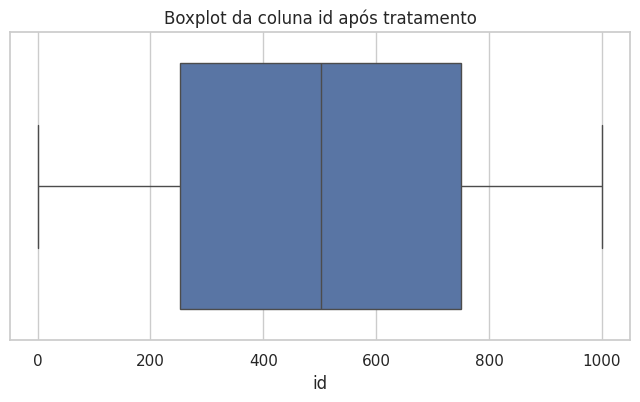

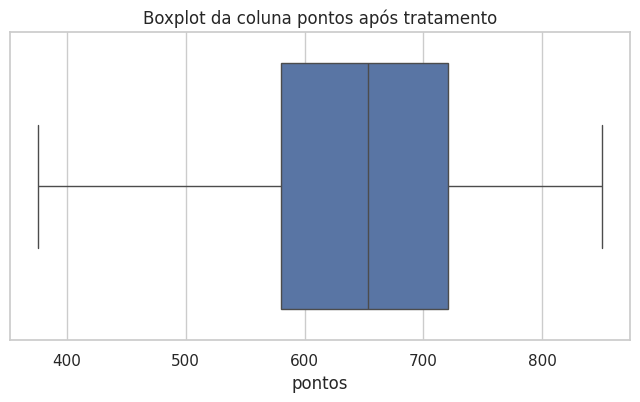

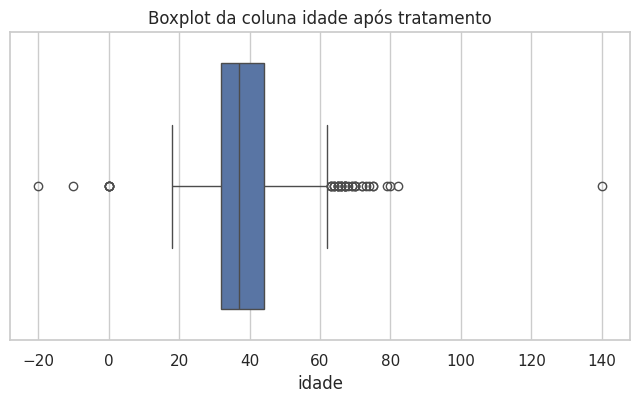

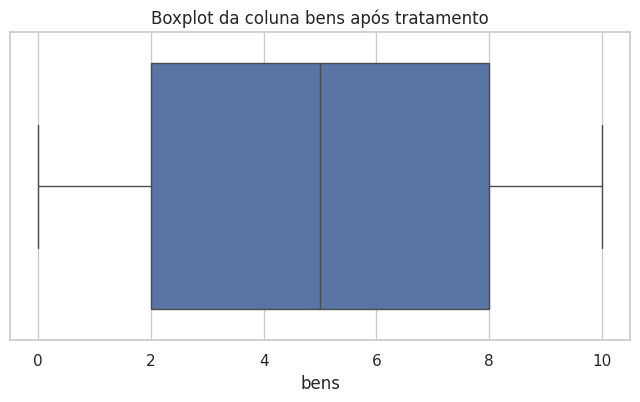

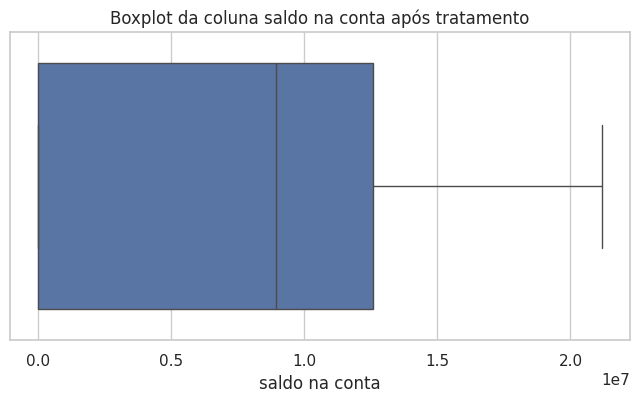

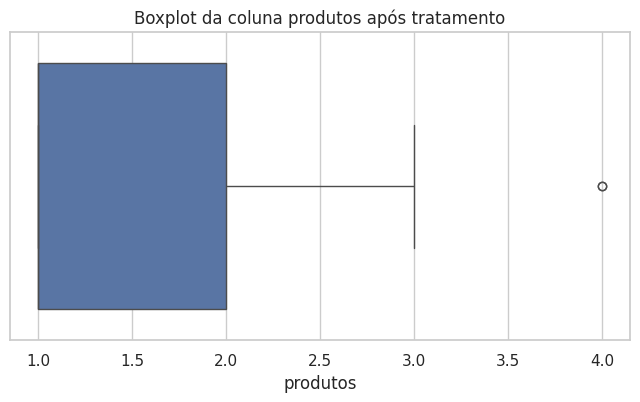

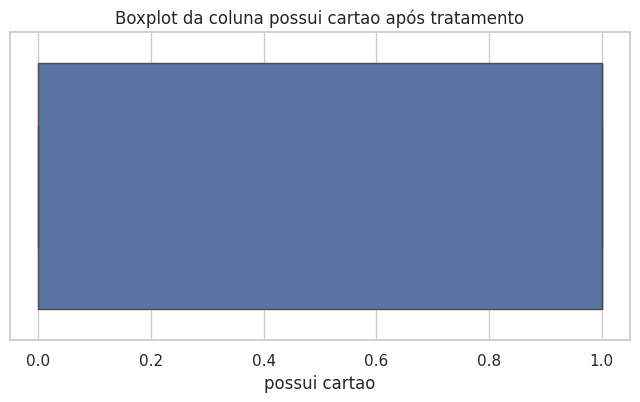

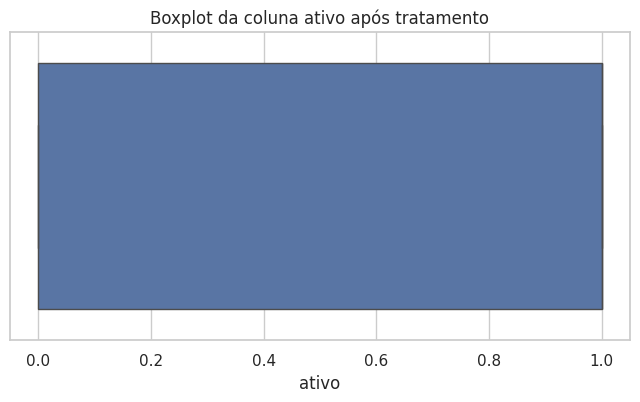

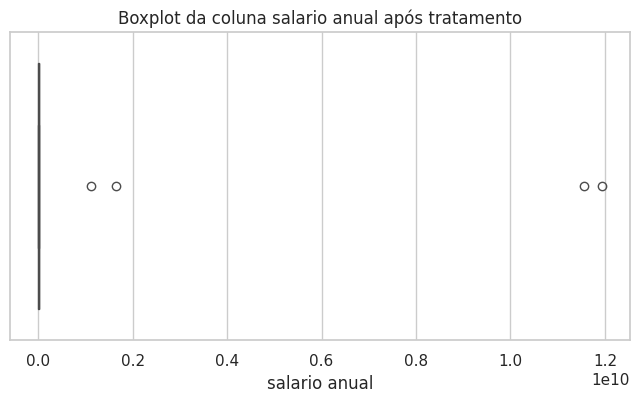

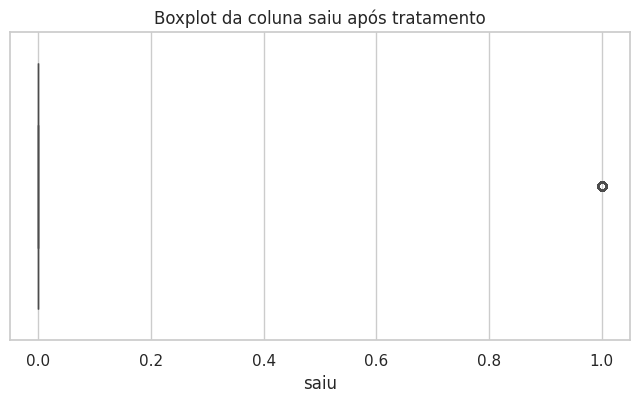

In [175]:
num_cols = dados.select_dtypes(include='number').columns  # Define as colunas numéricas
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dados[col])
    plt.title(f'Boxplot da coluna {col} após tratamento')
    plt.show()

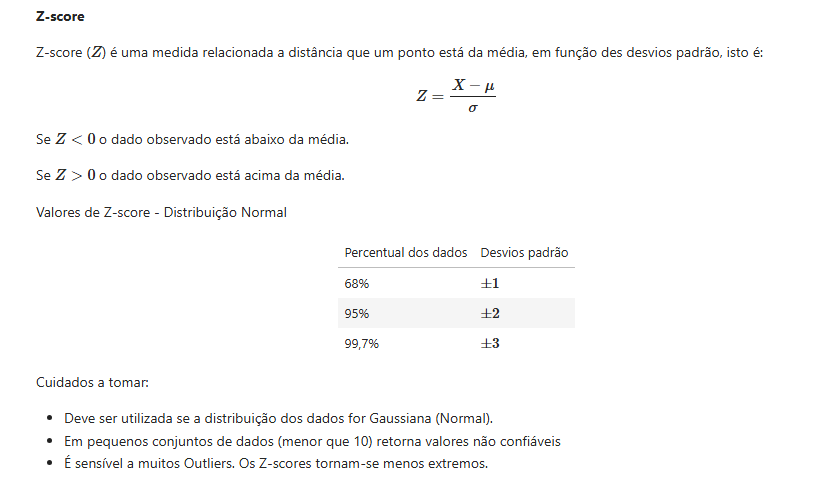

**1º Passo:** Calcular o Z-score

In [30]:
z_scores = (temp - np.mean(temp)) / np.std(temp)

print('Z-scores: ', z_scores)

Z-scores:  [-0.71355998 -1.08911786  1.53978732 -1.08911786 -0.71355998  1.53978732
  1.16422944  0.03755579  0.03755579 -0.71355998]


**2º Passo:** Remoção e Obtenção dos Outliers, ou seja, os Z-scores que ultrapassam o limiar 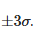

In [31]:
limiar = 3 #3 desvios padrão
temp_sem_outliers_Z_score = []
outliers                  = []
for i, z_score in enumerate(z_scores):
    if np.abs(z_score) > limiar:
        outliers.append(temp[i])
    else:
        temp_sem_outliers_Z_score.append(temp[i])

print('Outliers: ')
print(outliers)
print('Sem Outliers: ')
print(temp_sem_outliers_Z_score)

Outliers: 
[]
Sem Outliers: 
[np.int64(2), np.int64(1), np.int64(8), np.int64(1), np.int64(2), np.int64(8), np.int64(7), np.int64(4), np.int64(4), np.int64(2)]


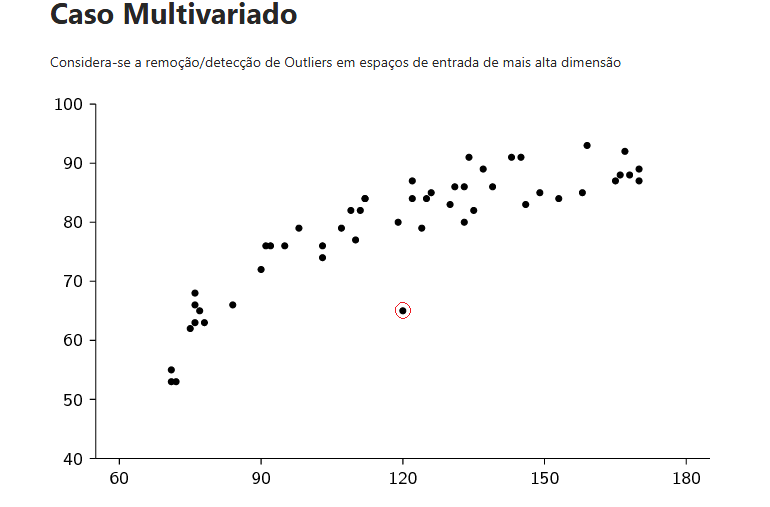

In [32]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y = True)

print('Nº Variáveis: %i' %X.shape[1])
print('Nº Amostras: %i' %X.shape[0])

Nº Variáveis: 10
Nº Amostras: 442


In [33]:

from sklearn.covariance import EllipticEnvelope

#Retorna -1 se a amostra é Outlier e 1 caso contrário
#O parâmetro 'contamination' é a proporção de Outliers no conjunto de dados.
#Varia entre (0,0.5]
out_EE = EllipticEnvelope(contamination=0.1).fit_predict(X)

outliers = X[out_EE == -1, :]
X_out    = X[out_EE == 1, :]

print('Nº Outliers: %i' % outliers.shape[0])
print('\nDados sem Outliers')
print('Nº Variáveis: %i' %X_out.shape[1])
print('Nº Amostras: %i' %X_out.shape[0])

Nº Outliers: 45

Dados sem Outliers
Nº Variáveis: 10
Nº Amostras: 397


Regressão Linear

In [34]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


In [35]:

#Separa os dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#Aplica a Regressão Linear
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Regressão Linear com Outliers')
print('MAE: %.4f' %mean_absolute_error(y_test, y_pred))

Regressão Linear com Outliers
MAE: 42.0026


In [36]:

from sklearn.ensemble import IsolationForest

#Retorna -1 se a amostra é Outlier e 1 caso contrário
out_IF = IsolationForest(contamination=0.1).fit_predict(X)

outliers = X[out_IF != 1 , :]
X_out    = X[out_IF != -1, :]

print('Nº Outliers: %i' % outliers.shape[0])
print('\nDados sem Outliers')
print('Nº Variáveis: %i' %X_out.shape[1])
print('Nº Amostras: %i' %X_out.shape[0])

Nº Outliers: 45

Dados sem Outliers
Nº Variáveis: 10
Nº Amostras: 397


In [42]:

#Aplica a remoção de Outliers nos dados de treinamento
out_IF = IsolationForest(contamination=0.1).fit_predict(X_train)

X_train_wo = X_train[out_IF == 1, :]
y_train_wo = y_train[out_IF == 1]

#Aplica a Regressão Linear nos dados sem Outliers
lr = LinearRegression().fit(X_train_wo, y_train_wo)
y_pred_wo = lr.predict(X_test)

print('Regressão Linear sem Outliers')
print('MAE: %.4f' %mean_absolute_error(y_test, y_pred_wo))


Regressão Linear sem Outliers
MAE: 41.5361


Gráfico



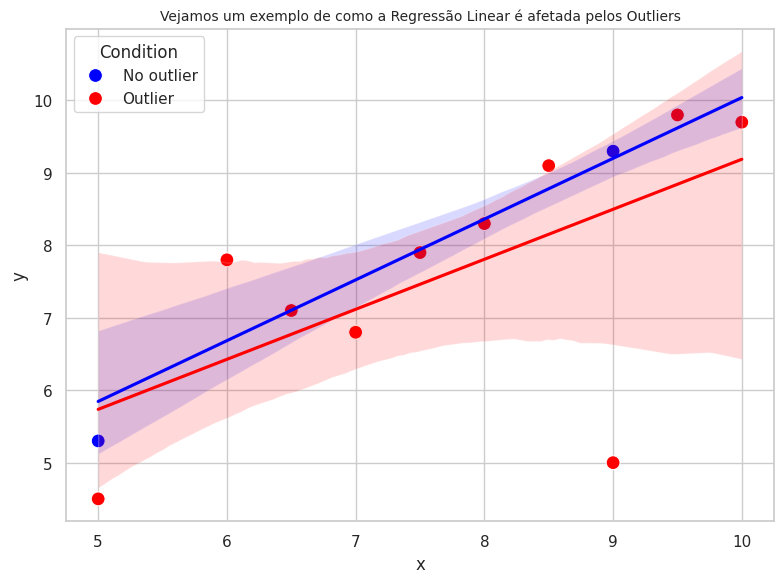

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados sem outlier
x = np.array([5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
y_no_outlier = np.array([5.3, 7.8, 7.1, 6.8, 7.9, 8.3, 9.1, 9.3, 9.8, 9.7])

# Dados com outlier (modificando apenas dois pontos)
y_outlier = y_no_outlier.copy()
y_outlier[0] = 4.5   # outlier baixo
y_outlier[7] = 5.0   # outro outlier

# Criar DataFrame
df_no_outlier = pd.DataFrame({'x': x, 'y': y_no_outlier, 'Condition': 'No outlier'})
df_outlier = pd.DataFrame({'x': x, 'y': y_outlier, 'Condition': 'Outlier'})
df = pd.concat([df_no_outlier, df_outlier])

# Plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Gráfico de dispersão
sns.scatterplot(data=df, x='x', y='y', hue='Condition', palette={'No outlier': 'blue', 'Outlier': 'red'}, s=100)

# Regressões
sns.regplot(x=x, y=y_no_outlier, scatter=False, color='blue')
sns.regplot(x=x, y=y_outlier, scatter=False, color='red')

plt.title("Vejamos um exemplo de como a Regressão Linear é afetada pelos Outliers", fontsize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()


6 - Explore colunas categóricas, utilizando função **groupby()** e outras, visando aplicar os gráficos para visualizações e a compreensão desses dados.

In [126]:
dados.groupby('pontos')


Distribuição de estado:
estado           CE        MA        MG        PI        RP        SP
proporcao  0.258517  0.257515  0.001002  0.477956  0.001002  0.004008


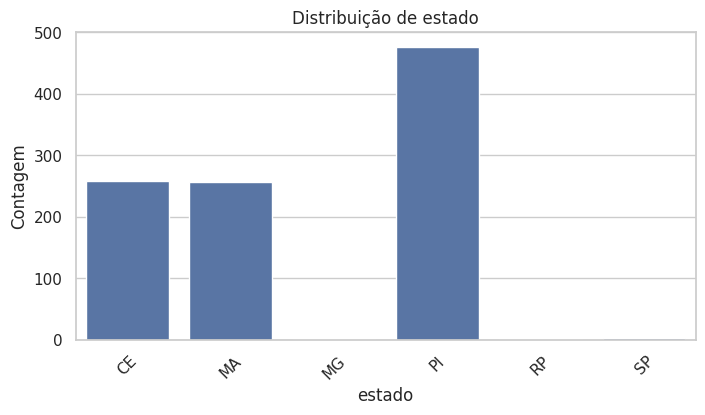


Distribuição de genero:
genero            0  Feminino  Masculino
proporcao  0.008016  0.463928   0.528056


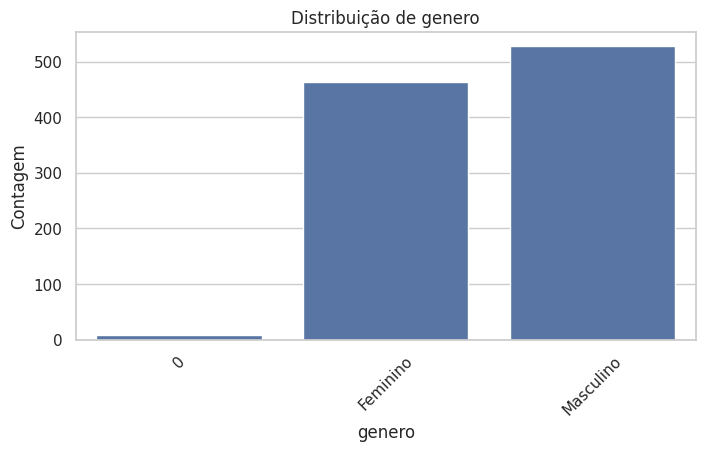


Distribuição de possui cartao:
possui cartao         0         1
proporcao      0.296593  0.703407


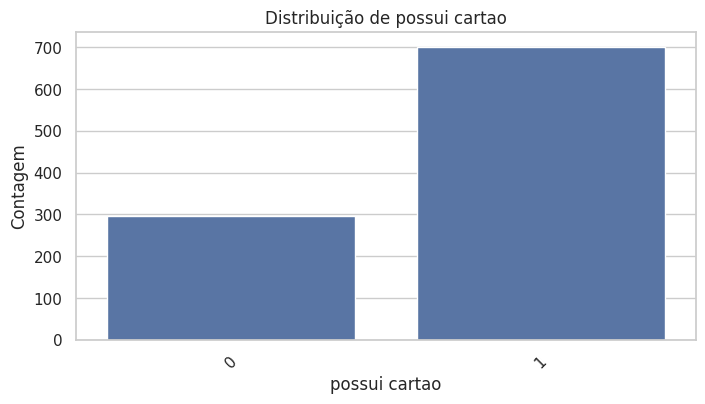


Distribuição de ativo:
ativo            0        1
proporcao  0.48998  0.51002


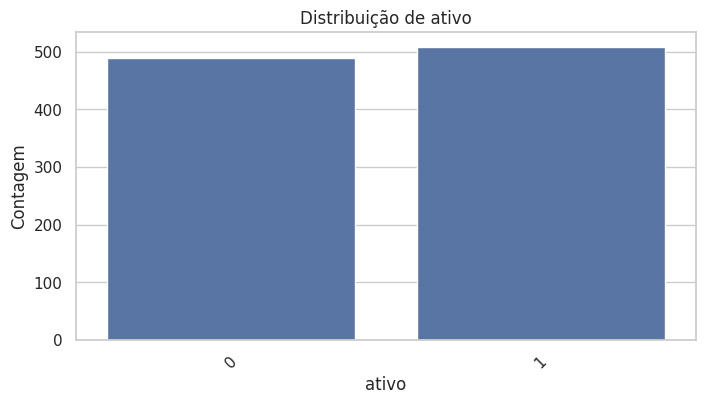


Distribuição de saiu:
saiu              0         1
proporcao  0.796593  0.203407


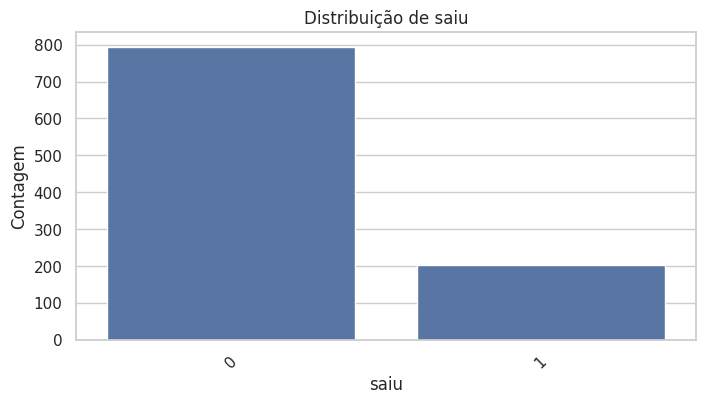


Distribuição de produtos:
produtos          1         2         3         4
proporcao  0.512024  0.451904  0.034068  0.002004


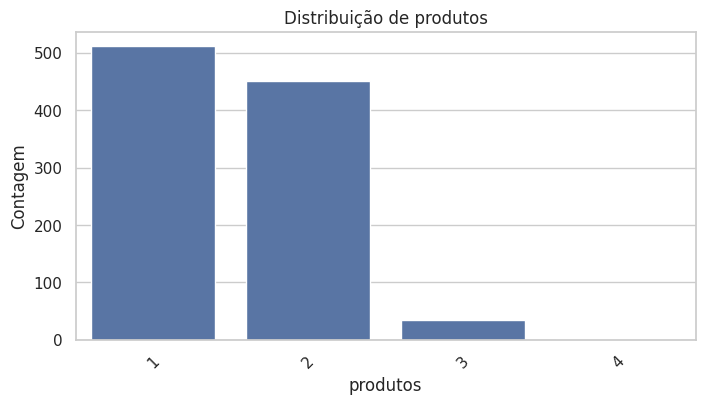

In [127]:
# Colunas categóricas
categorical_cols = ['estado', 'genero', 'possui cartao', 'ativo', 'saiu','produtos']

# Análise de frequência com groupby
for col in categorical_cols:
    print(f"\nDistribuição de {col}:")

    # Usando groupby para calcular as proporções (equivalente a value_counts(normalize=True))
    freq_table = dados.groupby(col).size().div(len(dados)).reset_index(name='proporcao')
    print(freq_table.set_index(col).T)

    # Gráfico de barras usando groupby
    plt.figure(figsize=(8,4))

    # Agrupar e contar os valores
    plot_data = dados.groupby(col).size().reset_index(name='contagem')

    # Criar o gráfico de barras
    sns.barplot(data=plot_data, x=col, y='contagem')
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Contagem')
    plt.show()

7 - Explore colunas numéricas, utilizando a função
**describe()**, faça um boxplot ou outro gráfico que achar necessário, utilizando as bibliotecas pandas e ** seaborn**;

           pontos       idade        bens  saldo na conta    produtos  \
count  998.000000  998.000000  998.000000    9.980000e+02  998.000000   
mean   648.605210   38.907816    5.073146    7.162423e+06    1.526052   
std     98.312117   11.406570    2.926320    6.314508e+06    0.574293   
min    376.000000  -20.000000    0.000000    0.000000e+00    1.000000   
25%    580.000000   32.000000    2.000000    0.000000e+00    1.000000   
50%    653.000000   37.000000    5.000000    8.926348e+06    1.000000   
75%    721.000000   44.000000    8.000000    1.258767e+07    2.000000   
max    850.000000  140.000000   10.000000    2.117743e+07    4.000000   

       salario anual  
count   9.980000e+02  
mean    3.505829e+07  
std     5.289890e+08  
min     0.000000e+00  
25%     2.849010e+06  
50%     8.637196e+06  
75%     1.401381e+07  
max     1.193469e+10  


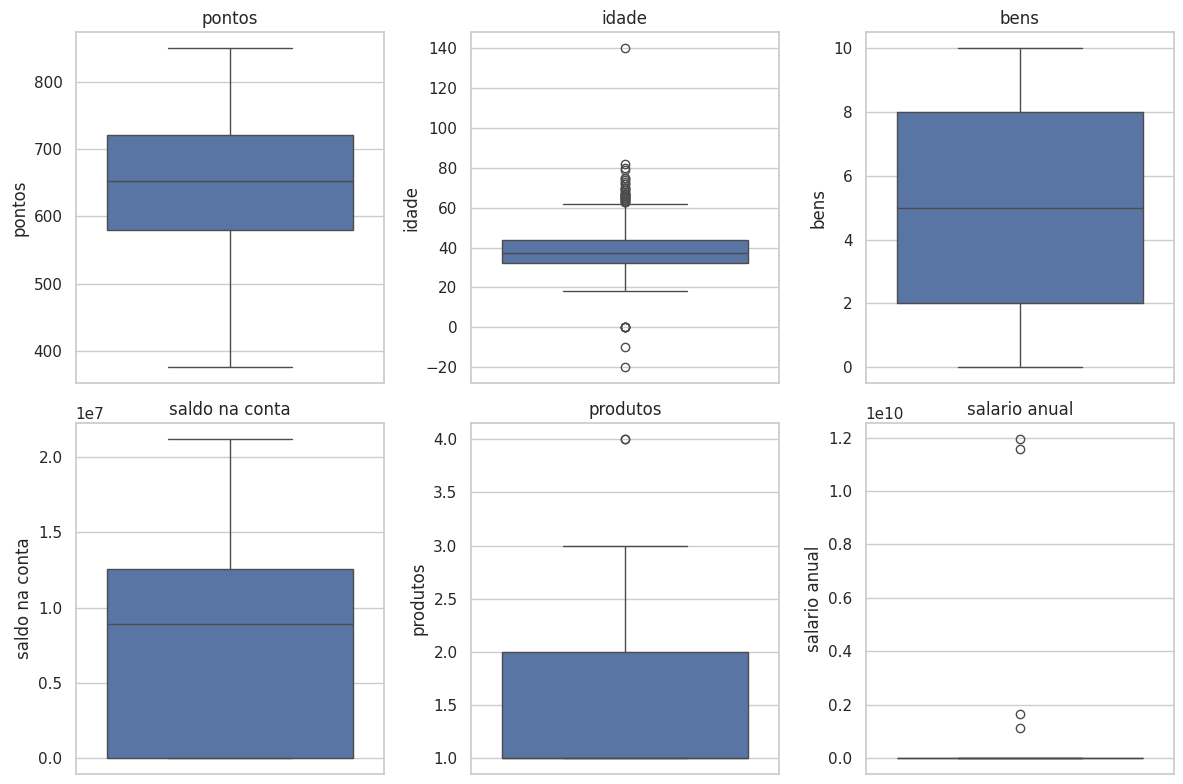

In [177]:
# Colunas numéricas
numeric_cols = ['pontos', 'idade', 'bens', 'saldo na conta', 'produtos', 'salario anual']

# Estatísticas descritivas
print(dados[numeric_cols].describe())

# Boxplots para visualizar outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=dados[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**DADOS**

In [178]:
dados

,id,pontos,estado,genero,idade,bens,saldo na conta,produtos,possui cartao,ativo,salario anual,saiu
0,1,619,PI,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,PI,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,PI,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0


8 - Mostre o tamanho dos dados importados, utilizando o shape.

In [179]:
dados.shape

(998, 12)

Tupla: Primeiro elemento a quantidade de linhas (0 A 999) e o segundo elemento as colunas (12).

SALVAR: planilha na pasta de Origem do driver

In [ ]:
# Caminho onde você quer salvar o arquivo tratado
#caminho_saida = '/content/drive/MyDrive/Limpeza de dados/dados_tratados.xlsx'

# Salvar os dados tratados
#dados.to_excel(caminho_saida, index=False)

#print(f"Arquivo salvo em: {caminho_saida}")


In [180]:
# Caminhos onde você quer salvar os arquivos
caminho_excel = '/content/drive/MyDrive/Limpeza de dados/dados_tratados.xlsx' # Insira o caminho da sua pasta criada driver.
caminho_csv = '/content/drive/MyDrive/Limpeza de dados/dados_tratados.csv'

# Salvar como Excel
dados.to_excel(caminho_excel, index=False)

# Salvar como CSV
dados.to_csv(caminho_csv, index=False)

print(f"Arquivos salvos em:\n- Excel: {caminho_excel}\n- CSV: {caminho_csv}")

Arquivos salvos em:
- Excel: /content/drive/MyDrive/Limpeza de dados/dados_tratados.xlsx
- CSV: /content/drive/MyDrive/Limpeza de dados/dados_tratados.csv


**PARTE 2 - ESTATISTICA:**

- Apresente a média e a mediana do **saldo na conta** dos clientes abaixo de 40 anos;
- Apresente a média e a mediana do **saldo na conta** dos clientes acima de 40 anos;
- Apresente a média e a mediana do **saldo na conta** dos clientes que saíram e dos que permaneceram;
- Dos que saíram, mostre qual é o público predominante (Masculino ou Feminino), a idade, o saldo na conta, patrimônio e os seus respectivos estados;

**Lembre-se:**

- Este desafio é uma oportunidade para você melhorar suas habilidades em tratamento de dados e análise exploratória.
- Utilize as ferramentas e técnicas aprendidas para transformar dados brutos em insights interessantes.
- Seja criativo e explore diferentes abordagens para alcançar os melhores resultados.
- Pesquise mais sobre as bibliotecas citadas para o melhor entendimento delas.
- Não se limite a dicas dadas, pois são somente orientações.

DADOS TRATADOS

**1** -  Apresente a média e a mediana do saldo na conta dos clientes abaixo de 40 anos;

In [181]:
# Carregando os dados
caminho_arquivo = '/content/drive/MyDrive/Limpeza de dados/dados_tratados.csv'
dados = pd.read_csv(caminho_arquivo)

# Verificando as primeiras linhas para entender a estrutura
print(dados.head())
print("\nInformações sobre o dataframe:")
print(dados.info())

   id  pontos estado    genero  idade  bens  saldo na conta  produtos  \
0   1     619     PI  Feminino     42     2               0         1   
1   2     608     CE  Feminino     41     1         8380786         1   
2   3     502     PI  Feminino     42     8         1596608         3   
3   4     699     PI  Feminino     39     1               0         2   
4   5     850     CE  Feminino     43     2        12551082         1   

   possui cartao  ativo  salario anual  saiu  
0              1      1     10134888.0     1  
1              0      1     11254258.0     0  
2              1      0     11393157.0     1  
3              0      0      9382663.0     0  
4              1      1       790841.0     0  

Informações sobre o dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              998 non-null    int64  
 1   po

In [182]:
# Filtrando clientes abaixo de 40 anos
abaixo_40 = dados[dados['idade'] < 40]

# Calculando média e mediana do saldo na conta
media_abaixo_40 = abaixo_40['saldo na conta'].mean()
mediana_abaixo_40 = abaixo_40['saldo na conta'].median()

print("\nClientes abaixo de 40 anos:")
print(f"Média do saldo na conta: R${media_abaixo_40:,.2f}")
print(f"Mediana do saldo na conta: R${mediana_abaixo_40:,.2f}")


Clientes abaixo de 40 anos:
Média do saldo na conta: R$7,015,427.85
Mediana do saldo na conta: R$8,229,382.00


**2** - Apresente a média e a mediana do saldo na conta dos clientes acima de 40 anos;

In [183]:
# Filtrando clientes acima de 40 anos
acima_40 = dados[dados['idade'] >= 40]

# Calculando média e mediana do saldo na conta
media_acima_40 = acima_40['saldo na conta'].mean()
mediana_acima_40 = acima_40['saldo na conta'].median()

print("\nClientes acima de 40 anos:")
print(f"Média do saldo na conta: R${media_acima_40:,.2f}")
print(f"Mediana do saldo na conta: R${mediana_acima_40:,.2f}")


Clientes acima de 40 anos:
Média do saldo na conta: R$7,381,265.97
Mediana do saldo na conta: R$9,731,825.00


**3** - Apresente a média e a mediana do saldo na conta dos clientes que saíram e dos que permaneceram;

In [184]:
# Filtrando clientes que saíram (saiu = 1) e que permaneceram (saiu = 0)
clientes_sairam = dados[dados['saiu'] == 1]
clientes_permaneceram = dados[dados['saiu'] == 0]

# Calculando para os que saíram
if not clientes_sairam.empty:
    media_sairam = clientes_sairam['saldo na conta'].mean()
    mediana_sairam = clientes_sairam['saldo na conta'].median()
    print("\nClientes que saíram:")
    print(f"Média do saldo na conta: R${media_sairam:,.2f}")
    print(f"Mediana do saldo na conta: R${mediana_sairam:,.2f}")
else:
    print("\nNão há clientes que saíram na base de dados.")

# Calculando para os que permaneceram
media_permaneceram = clientes_permaneceram['saldo na conta'].mean()
mediana_permaneceram = clientes_permaneceram['saldo na conta'].median()
print("\nClientes que permaneceram:")
print(f"Média do saldo na conta: R${media_permaneceram:,.2f}")
print(f"Mediana do saldo na conta: R${mediana_permaneceram:,.2f}")


Clientes que saíram:
Média do saldo na conta: R$8,523,988.16
Mediana do saldo na conta: R$10,843,187.00

Clientes que permaneceram:
Média do saldo na conta: R$6,814,752.81
Mediana do saldo na conta: R$8,061,393.00


**4** - Dos que saíram, mostre qual é o público predominante (Masculino ou Feminino), a idade, o saldo na conta, patrimônio e os seus respectivos estados;

In [185]:
if not clientes_sairam.empty:
    # Contando gêneros dos que saíram
    contagem_genero = clientes_sairam['genero'].value_counts()

    # Verificando se há dados de gênero
    if not contagem_genero.empty:
        genero_predominante = contagem_genero.idxmax()
        print(f"\nGênero predominante entre os que saíram: {genero_predominante}")

        # Criando um subconjunto apenas com o gênero predominante
        predominante = clientes_sairam[clientes_sairam['genero'] == genero_predominante]

        # Calculando estatísticas
        idade_media = predominante['idade'].mean()
        saldo_medio = predominante['saldo na conta'].mean()
        patrimonio_medio = predominante['bens'].mean()
        estados = predominante['estado'].value_counts().head(3)  # Top 3 estados

        print("\nCaracterísticas do público predominante que saiu:")
        print(f"Idade média: {idade_media:.1f} anos")
        print(f"Saldo médio na conta: R${saldo_medio:,.2f}")
        print(f"Patrimônio médio (bens): {patrimonio_medio:.1f}")
        print("\nEstados mais frequentes:")
        print(estados)
    else:
        print("\nNão há informações de gênero para os clientes que saíram.")
else:
    print("\nNão há clientes que saíram na base de dados.")


Gênero predominante entre os que saíram: Feminino

Características do público predominante que saiu:
Idade média: 43.7 anos
Saldo médio na conta: R$8,201,914.06
Patrimônio médio (bens): 4.7

Estados mais frequentes:
estado
PI    50
MA    39
CE    30
Name: count, dtype: int64


**ANDRE MOURA LIMA**



In [ ]:
#erro a tabela saiu na esta aparerecend os valore sdepois do outlier